# QUERY 5.1
 For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. ( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')
r=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\EICHERMOT.csv')
r1=r['Close Price']
returns = r1.pct_change()
returns=returns.dropna(axis=0)
mean_return = returns.mean()
return_stdev = returns.std()
annualised_return = round(mean_return * 252,2)
annualised_stdev = round(return_stdev * np.sqrt(252),2)

# QUERY 5.2
 Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

In [7]:
r1=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Small_Cap\PVR.csv')
r2=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Small_Cap\FORTIS.csv')
r3=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\ADANIPOWER.csv')
r4=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Mid_Cap\PNB.csv')
r5=pd.read_csv(r'C:\Users\RACHIT\Desktop\dataset\Large_Cap\MARUTI.csv')

In [8]:
#Because different stocks have different sizes,so converging them to one fixed size
r1=r1[0:494]
r2=r2[0:494]
r5=r5[0:494]

In [24]:
data=pd.DataFrame({'pvr':r1['Close Price'],'fort':r2['Close Price'],'adani':r3['Close Price'],'pnb':r4['Close Price'],'mar':r5['Close Price']})
returns = data.pct_change()
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
mean_daily_returns=mean_daily_returns.dropna(axis=0)
cov_matrix = returns.cov()
#set array holding portfolio weights of each stock
weights = np.asarray([0.2,0.2,0.2,0.2,0.2])
#calculate annualised portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
#calculate annualised portfolio volatility
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)


# QUERY 5.3
 Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

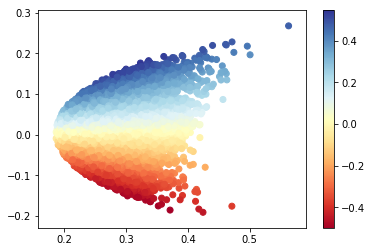

In [39]:
num_portfolios = 25000
#set up array to hold results
results = np.zeros((3,num_portfolios))
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(5)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()

# QUERY 5.4
Mark the 2 portfolios where -
Portfolio 1 - The Sharpe ratio is the highest
Portfolio 2 - The volatility is the lowest.

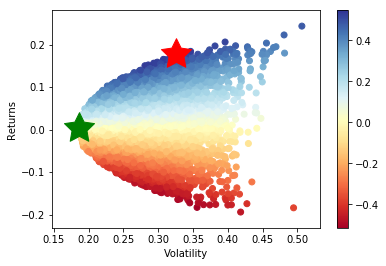

In [45]:
num_portfolios = 25000
#set up array to hold results
results = np.zeros((3,num_portfolios))
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(5)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)
